# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='F:\Jupyter\deep-reinforcement-learning\Deep Continuous Control\Reacher_Windows_x86_64\Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.09299999792128802


When finished, you can close the environment.

In [6]:
states.shape

(20, 33)

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
from ddpg_agent import *

In [7]:
num_agents = len(env_info.agents)
agents = Agent(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=0)

In [10]:
def ddpg(n_episodes=250):
    """Deep Deterministic Policy Gradient.
    
    Args
        n_episodes (int): maximum number of training episodes
    Return:
        scores (average score)

    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores

    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations
        agents.reset()
        score = np.zeros(num_agents)
        while True:
            action = agents.act(state)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations   # get the next state
            rewards = env_info.rewards                   # get the reward
            dones = env_info.local_done                  # see if episode has finished
            
            agents.step(state, action, rewards, next_state, dones)
            score += rewards                                # update the score
            state = next_state                             # roll over the state to next time step
            if np.any(dones):                                       # exit loop if episode finished
                break
        scores_window.append(np.mean(score))       # save most recent score
        scores.append(np.mean(score))              # save most recent score
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agents.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agents.critic_local.state_dict(), 'checkpoint_critic.pth')
    return scores

In [11]:
scores = ddpg()

Episode 100	Average Score: 19.33
Episode 139	Average Score: 30.16
Environment solved in 139 episodes!	Average Score: 30.16
Episode 140	Average Score: 30.35
Environment solved in 140 episodes!	Average Score: 30.35
Episode 141	Average Score: 30.52
Environment solved in 141 episodes!	Average Score: 30.52
Episode 142	Average Score: 30.67
Environment solved in 142 episodes!	Average Score: 30.67
Episode 143	Average Score: 30.85
Environment solved in 143 episodes!	Average Score: 30.85
Episode 144	Average Score: 31.02
Environment solved in 144 episodes!	Average Score: 31.02
Episode 145	Average Score: 31.18
Environment solved in 145 episodes!	Average Score: 31.18
Episode 146	Average Score: 31.35
Environment solved in 146 episodes!	Average Score: 31.35
Episode 147	Average Score: 31.52
Environment solved in 147 episodes!	Average Score: 31.52
Episode 148	Average Score: 31.65
Environment solved in 148 episodes!	Average Score: 31.65
Episode 149	Average Score: 31.77
Environment solved in 149 episodes

Episode 230	Average Score: 35.61
Environment solved in 230 episodes!	Average Score: 35.61
Episode 231	Average Score: 35.60
Environment solved in 231 episodes!	Average Score: 35.60
Episode 232	Average Score: 35.60
Environment solved in 232 episodes!	Average Score: 35.60
Episode 233	Average Score: 35.59
Environment solved in 233 episodes!	Average Score: 35.59
Episode 234	Average Score: 35.59
Environment solved in 234 episodes!	Average Score: 35.59
Episode 235	Average Score: 35.60
Environment solved in 235 episodes!	Average Score: 35.60
Episode 236	Average Score: 35.60
Environment solved in 236 episodes!	Average Score: 35.60
Episode 237	Average Score: 35.60
Environment solved in 237 episodes!	Average Score: 35.60
Episode 238	Average Score: 35.61
Environment solved in 238 episodes!	Average Score: 35.61
Episode 239	Average Score: 35.61
Environment solved in 239 episodes!	Average Score: 35.61
Episode 240	Average Score: 35.62
Environment solved in 240 episodes!	Average Score: 35.62
Episode 24

In [12]:
%matplotlib inline

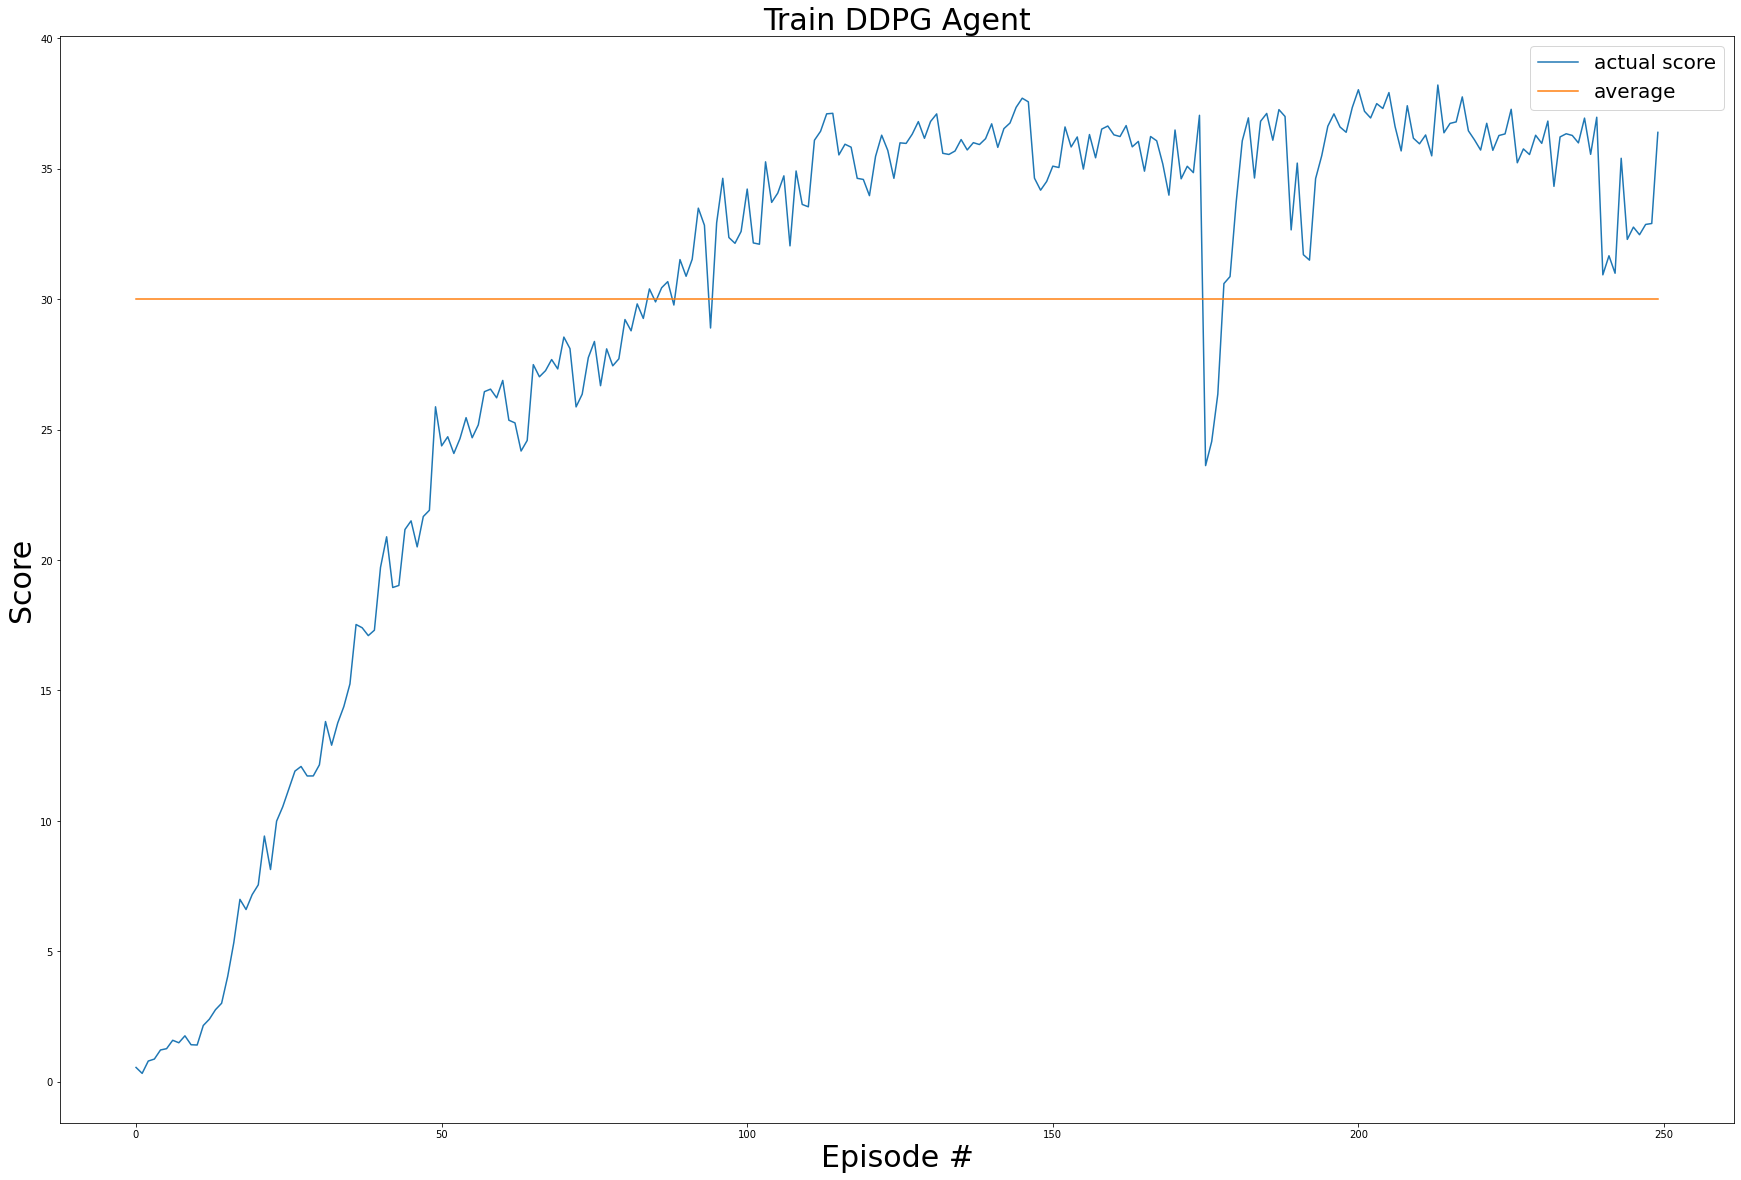

In [13]:
import matplotlib.pyplot as plt 

# plot the scores
average_score = 30
success = [average_score] * len(scores)
fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores,np.arange(len(scores)), success)
plt.ylabel('Score', fontsize = 30)
plt.xlabel('Episode #', fontsize = 30)
plt.title('Train DDPG Agent', fontsize = 30)
plt.gca().legend(('actual score','average'), fontsize = 20)
plt.show()

In [9]:
agents.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agents.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = agents.act(states,add_noise = False) # select an action (for each agent)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))
        


Total score (averaged over agents) this episode: 38.55449913823977


In [10]:
env.close()